# Assignment-15-Random-Forest (company data)

## 1. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn import tree

## 2. Importing data

In [2]:
df= pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## 3. Understanding data

In [3]:
print('No. of observations:{}\nNo. of features:{}'.format(df.shape[0],df.shape[1]))

No. of observations:400
No. of features:11


In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [6]:
df.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [7]:
#  Outlier check

<Axes: >

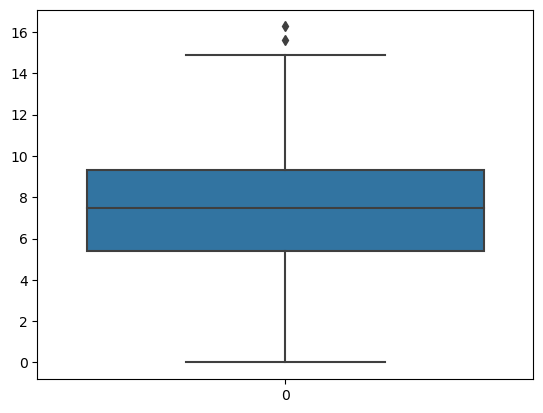

In [8]:
sns.boxplot(df['Sales'])

In [9]:
#The data has 2 outlier instances

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


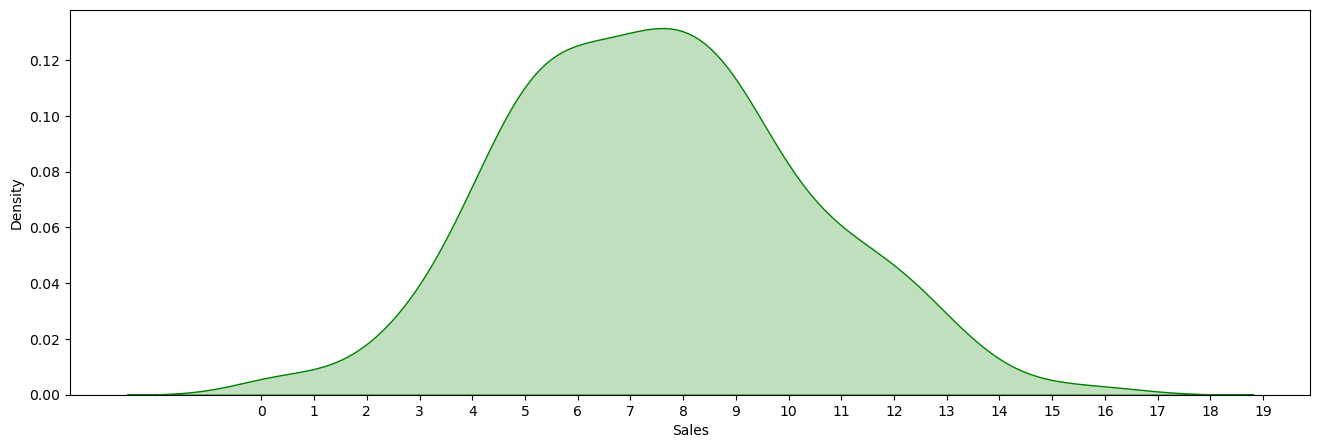

In [10]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df['Sales'].skew()))
print("Kurtosis: {}".format(df['Sales'].kurtosis()))
ax = sns.kdeplot(df['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [11]:
# Data is Skewed on the right
# Data has negative Kurtosis

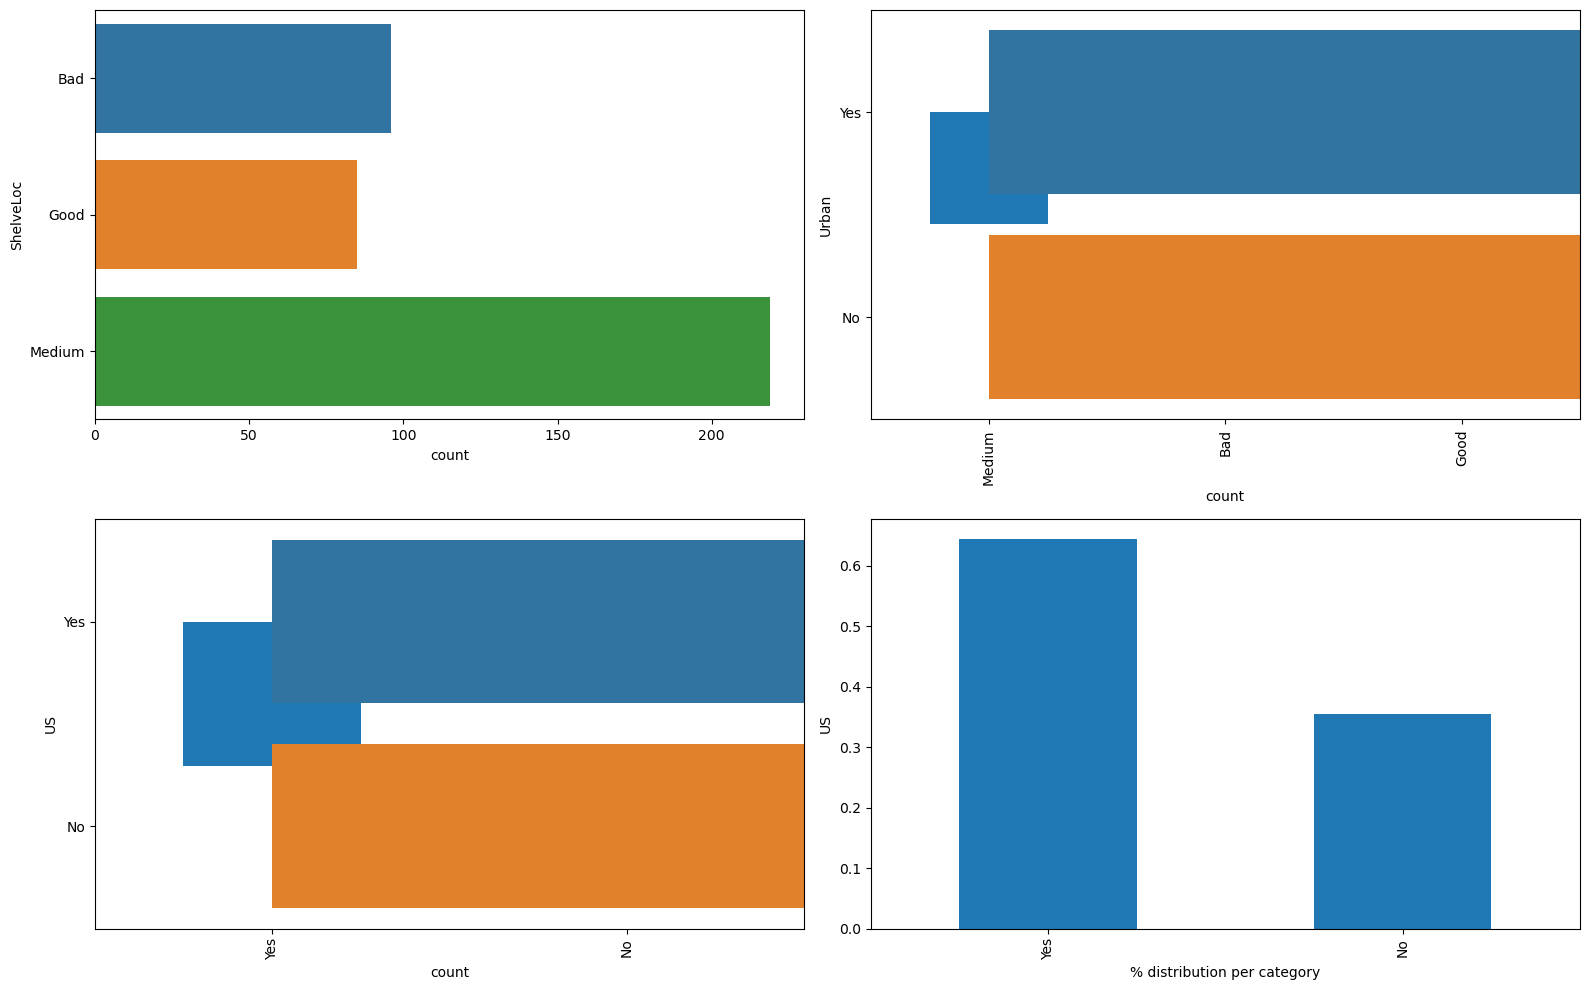

In [12]:
obj_colum= df.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df,y=col)
    plt.subplot(2,2,i+1)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

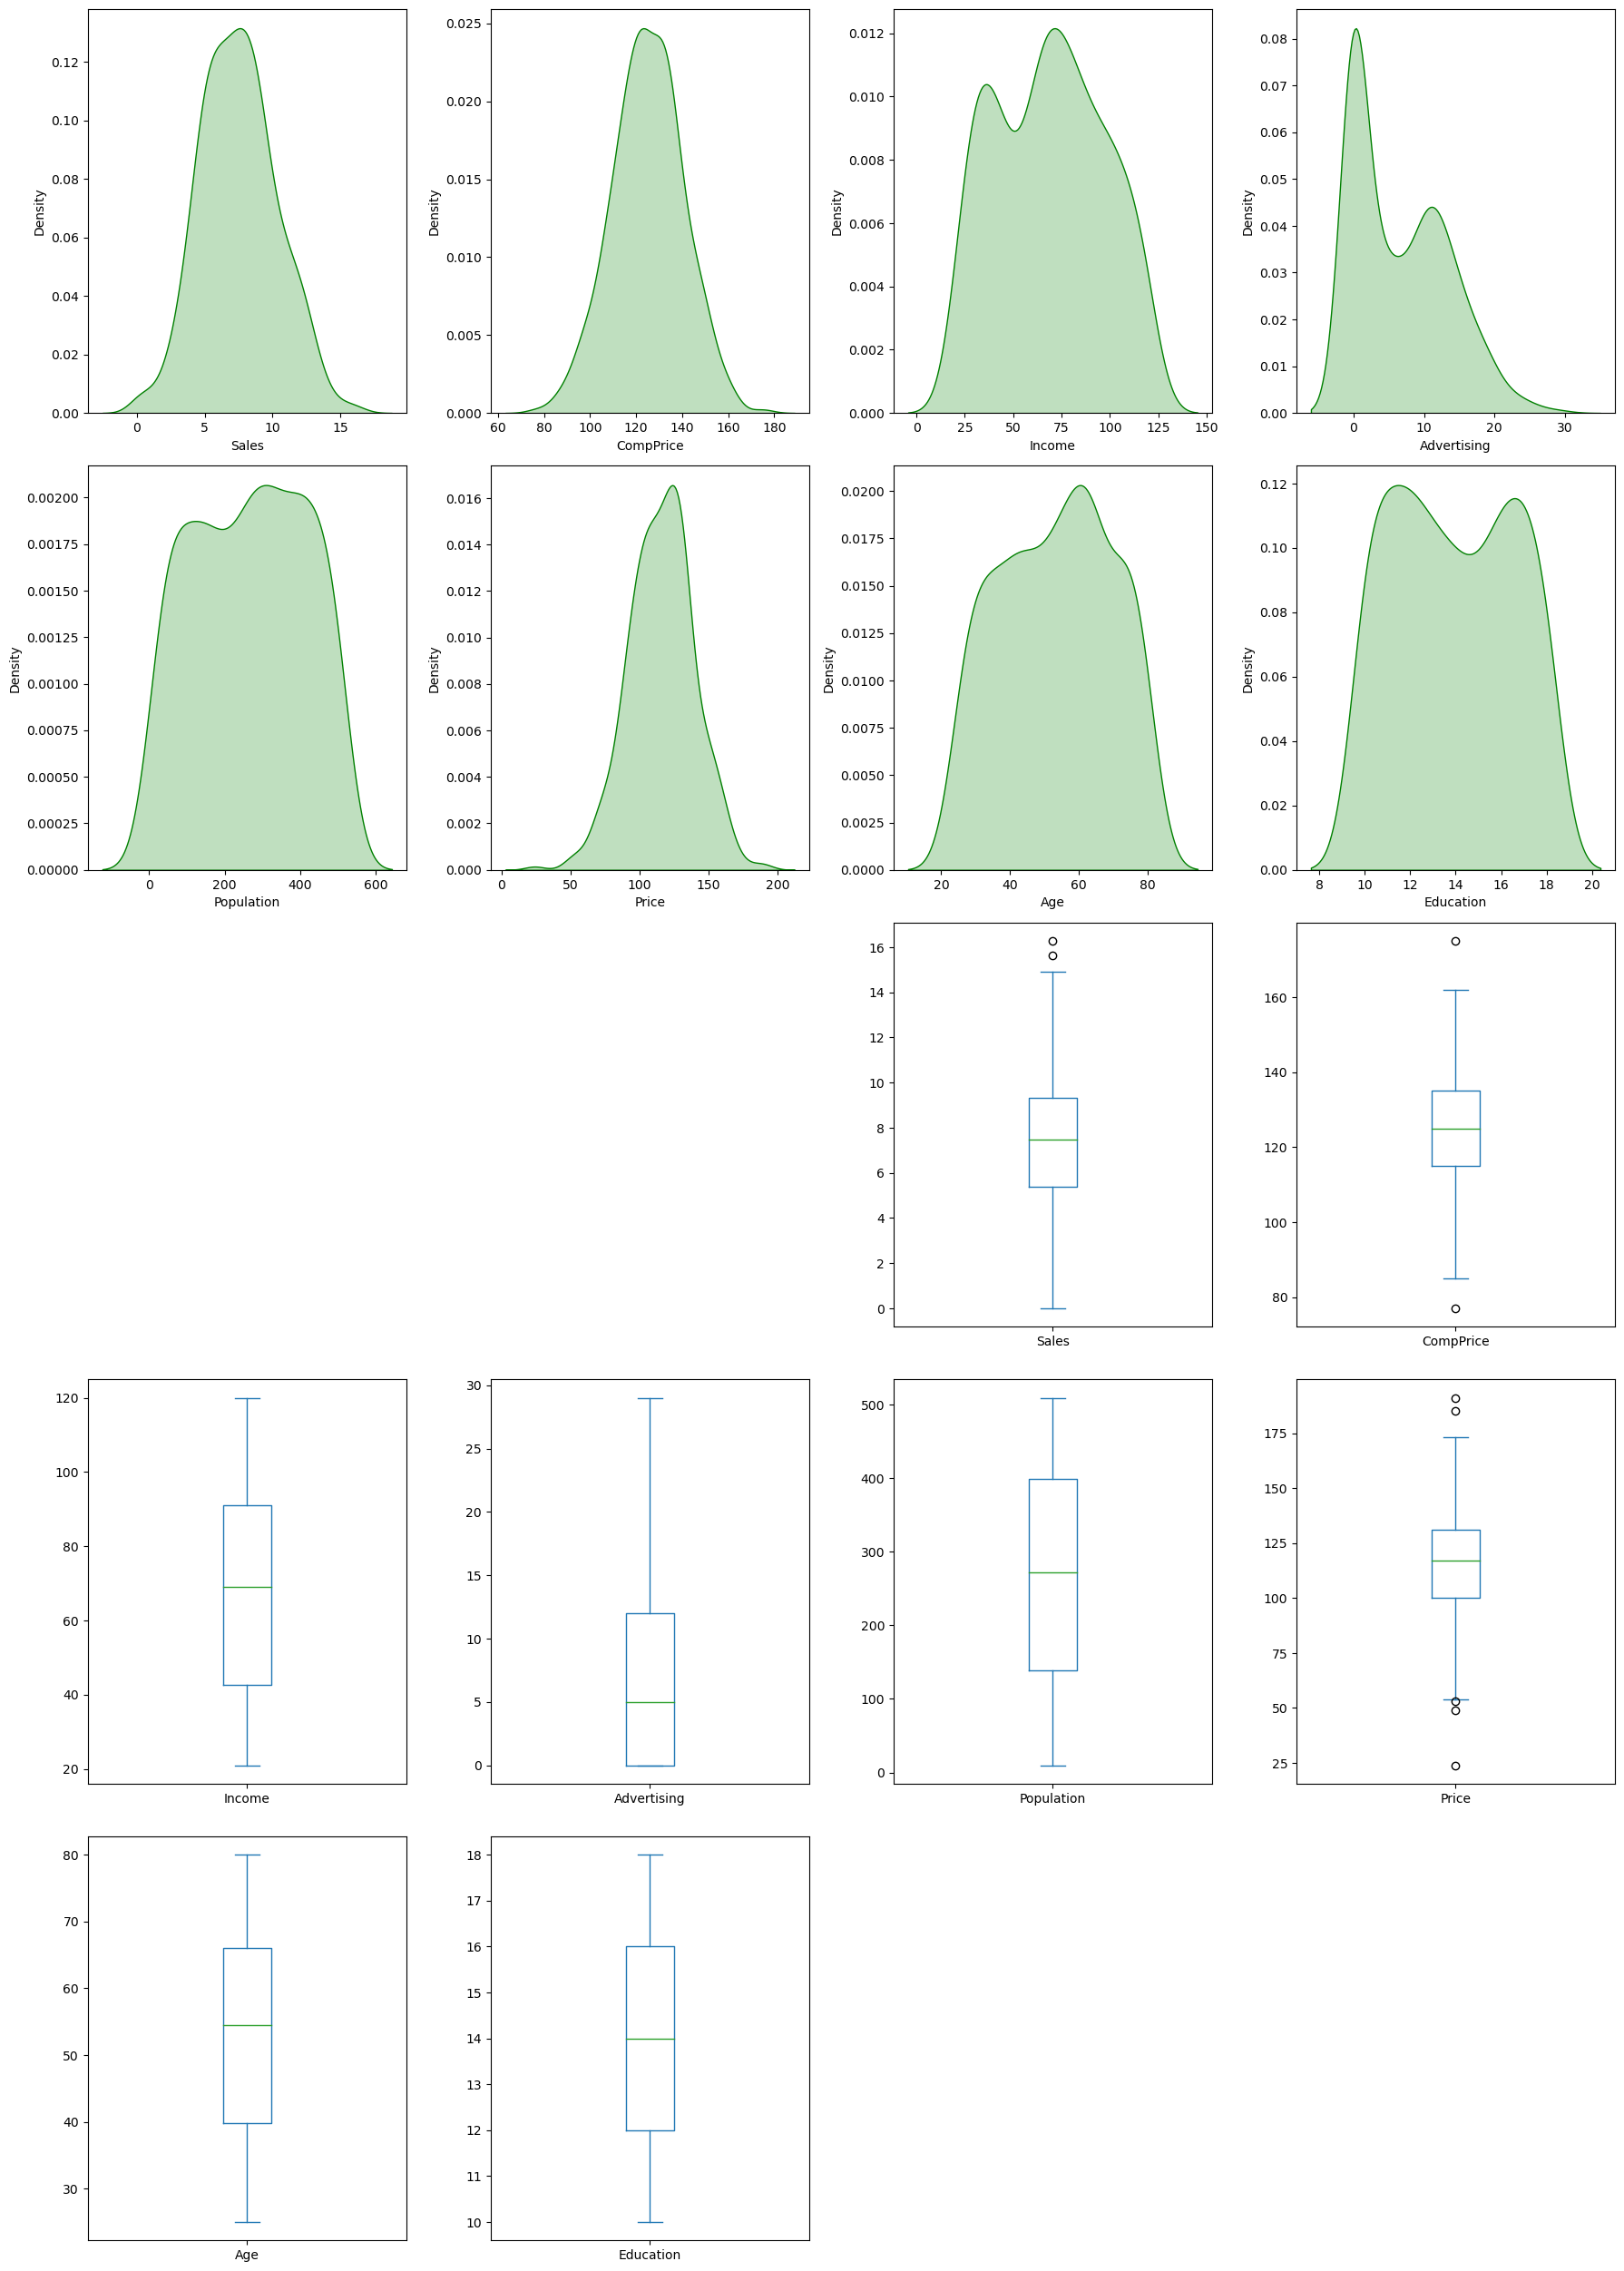

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [13]:
num_columns= df.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [14]:
df1= df.copy()
df1= pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,7.40,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,4.15,141,64,3,340,128,38,13,True,False,False,False,True,True,False


In [15]:
corr= df1.corr()

<Axes: >

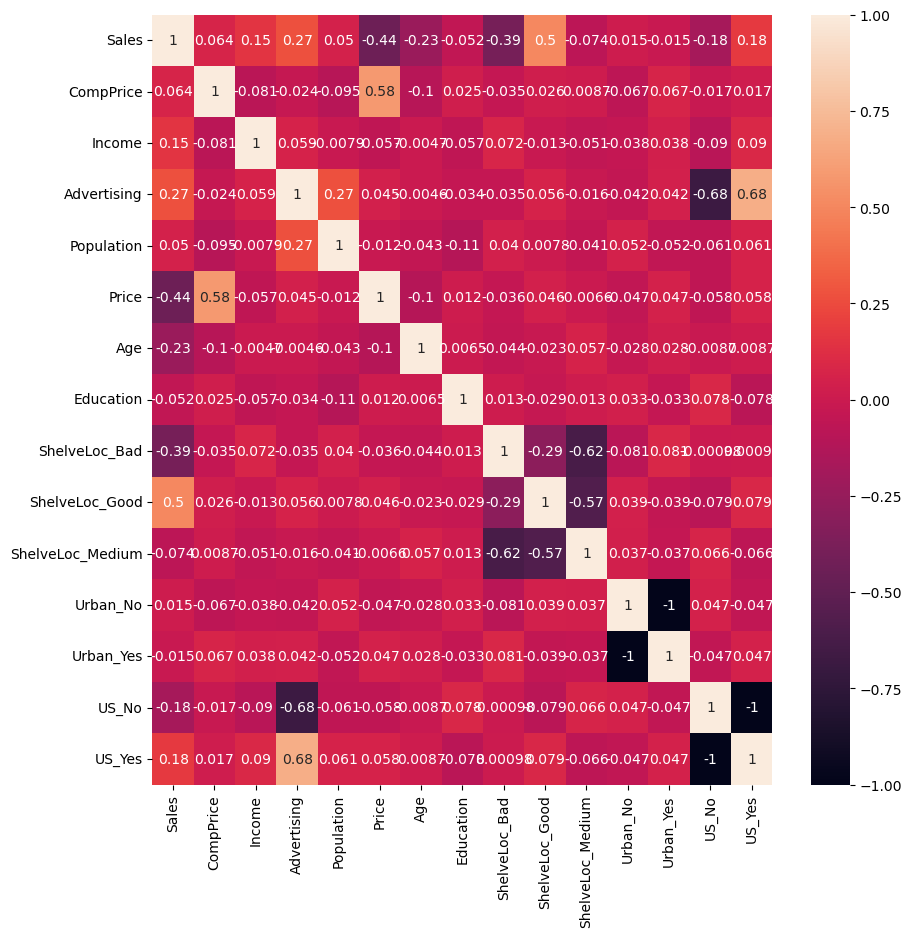

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

## 4. Model Building
Since the target variable is continious, we create a class of the value based on the mean
<= 7.49 == "Small" and > 7.49 == "large"

In [17]:
df1["sales"]= "small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis= 1,inplace= True)

In [18]:
x= df1.iloc[:,0:14]
y= df1.iloc[:,14]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [20]:
y_train.value_counts()

sales
small    161
large    159
Name: count, dtype: int64

In [21]:
model= RandomForestClassifier(n_jobs=4,n_estimators = 150,criterion ='entropy') 
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, n_jobs=4)

In [22]:
y_pred= model.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred)

0.7875

In [24]:
confusion_matrix(y_test,y_pred)

array([[29, 11],
       [ 6, 34]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       large       0.83      0.72      0.77        40
       small       0.76      0.85      0.80        40

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [26]:
print('Training Accuracy: ',model.score(x_train,y_train))
print('Testing Accuracy: ', model.score(x_test,y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.7875


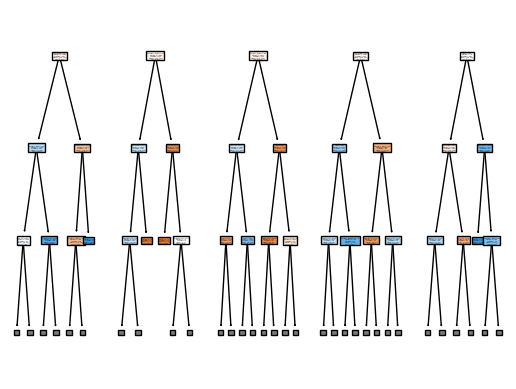

In [28]:
fig,ax = plt.subplots(1,5)

for i in range(0,5):
    tree.plot_tree(model.estimators_[i],
                  feature_names=list(x.columns),
                  class_names=list(df1['sales'].unique()),
                  filled=True,
                   max_depth=2,
                  ax  = ax[i])

## 4 - Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 76%


In [29]:
rf_small= RandomForestClassifier(n_estimators=10, max_depth = 3)

In [30]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [31]:
tree_small= rf_small.estimators_[5]

In [32]:
fi= pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.237665
5,Age,0.120737
0,CompPrice,0.107698
1,Income,0.096792
2,Advertising,0.095167
3,Population,0.086288
8,ShelveLoc_Good,0.079894
6,Education,0.061342
7,ShelveLoc_Bad,0.041791
9,ShelveLoc_Medium,0.025352


# As seen in the above table Price is most important feature